<a href="https://colab.research.google.com/github/jasonstoy/TensorFlow/blob/main/10.%20CNN%20%26%20CV(MultiClass).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

--2021-08-29 19:44:16--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.197.128, 64.233.191.128, 173.194.74.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.197.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   165MB/s    in 3.0s    

2021-08-29 19:44:19 (165 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [2]:
#Get data
import zipfile

#Unzip
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip")
zip_ref.extractall()
zip_ref.close()

In [5]:
import os

#Check data
for dir_path, dir_names, file_names in os.walk("10_food_classes_all_data"):
  print(f"There are {len(file_names)} files and {len(dir_names)} folders under path {dir_path}")



There are 0 files and 2 folders under path 10_food_classes_all_data
There are 0 files and 10 folders under path 10_food_classes_all_data/test
There are 250 files and 0 folders under path 10_food_classes_all_data/test/hamburger
There are 250 files and 0 folders under path 10_food_classes_all_data/test/chicken_wings
There are 250 files and 0 folders under path 10_food_classes_all_data/test/fried_rice
There are 250 files and 0 folders under path 10_food_classes_all_data/test/sushi
There are 250 files and 0 folders under path 10_food_classes_all_data/test/pizza
There are 250 files and 0 folders under path 10_food_classes_all_data/test/ice_cream
There are 250 files and 0 folders under path 10_food_classes_all_data/test/steak
There are 250 files and 0 folders under path 10_food_classes_all_data/test/chicken_curry
There are 250 files and 0 folders under path 10_food_classes_all_data/test/grilled_salmon
There are 250 files and 0 folders under path 10_food_classes_all_data/test/ramen
There are 

In [22]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [23]:
import pathlib
import numpy as np

#Get class names

data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [28]:
import random
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class
  
  random_image = random.sample(os.listdir(target_folder), 1)

  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}")
  
  return img

Image shape: (384, 512, 3)


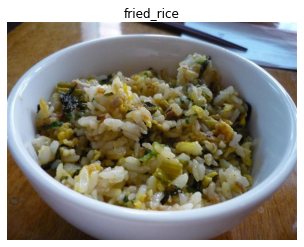

In [29]:
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

In [34]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.,
                                   rotation_range=0.2, 
                                   width_shift_range=0.2, 
                                   height_shift_range=0.2, 
                                   shear_range=0.2, 
                                   zoom_range=0.2,
                                   horizontal_flip=True, 
                                   vertical_flip=True)

test_datagen = ImageDataGenerator(rescale=1/255.)

In [35]:
train_data = train_datagen.flow_from_directory(train_dir,
                                              target_size=(224,224),
                                              batch_size=32,
                                              class_mode="categorical",
                                              shuffle=True,
                                              seed=5)

test_data = valid_datagen.flow_from_directory(test_dir,
                                              target_size=(224,224),
                                              batch_size=32,
                                              class_mode="categorical",
                                              shuffle=True,
                                              seed=5)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [45]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.activations import softmax

In [46]:
model = tf.keras.Sequential([
  Conv2D(filters=10,
         kernel_size=3,
         strides=1,
         padding="valid",
         activation="relu",
         input_shape=(224,224,3)),
  MaxPool2D(pool_size=2),
  Conv2D(filters=10,
         kernel_size=3,
         strides=1,
         padding="valid",
         activation="relu"),
  MaxPool2D(pool_size=2),
  Conv2D(filters=10,
         kernel_size=3,
         strides=1,
         padding="valid",
         activation="relu"),
  MaxPool2D(pool_size=2),
  Flatten(),
  Dense(len(class_names), activation=softmax)
])

In [53]:
model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=Adam(),
              metrics=["accuracy"])

In [54]:
history = model.fit(train_data,
                    epochs=5,
                    steps_per_epoch=len(train_data),
                    validation_data=test_data,
                    validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 129s 541ms/step - loss: 2.2857 - accuracy: 0.1321 - val_loss: 2.2578 - val_accuracy: 0.1676
Epoch 2/5
235/235 [==============================] - 125s 531ms/step - loss: 2.1878 - accuracy: 0.1935 - val_loss: 2.1318 - val_accuracy: 0.2140
Epoch 3/5
235/235 [==============================] - 125s 533ms/step - loss: 2.1443 - accuracy: 0.2168 - val_loss: 2.1109 - val_accuracy: 0.2380
Epoch 4/5
235/235 [==============================] - 126s 538ms/step - loss: 2.0972 - accuracy: 0.2531 - val_loss: 1.9562 - val_accuracy: 0.3084
Epoch 5/5
235/235 [==============================] - 123s 525ms/step - loss: 2.0348 - accuracy: 0.2788 - val_loss: 1.8944 - val_accuracy: 0.3456


In [57]:
model.evaluate(test_data)

79/79 [==============================] - 12s 156ms/step - loss: 1.8944 - accuracy: 0.3456


[1.894449234008789, 0.3456000089645386]

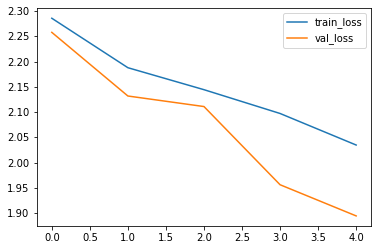

In [62]:
import pandas as pd
pd.DataFrame({"train_loss": history.history['loss'],
              "val_loss": history.history['val_loss']}).plot()

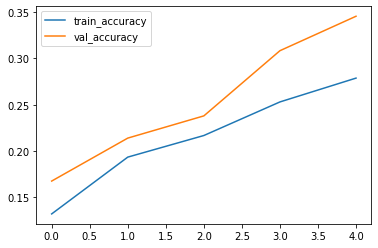

In [63]:
pd.DataFrame({"train_accuracy": history.history['accuracy'],
              "val_accuracy": history.history['val_accuracy']}).plot()